<a href="https://colab.research.google.com/github/HR1007/-CShape-CTriangle/blob/main/111%E5%B9%B4%E5%8F%B0%E5%8D%97%E5%B8%82%E4%BA%A4%E9%80%9A%E4%BA%8B%E6%95%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

導入套件

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!pip install -q matplotlib
!apt-get -qq install -y fonts-wqy-microhei


--2023-08-02 02:13:21--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.31.100, 142.250.31.102, 142.250.31.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/adcksc5n01b5qdbk2gqfcb618f9fe6h9/1690942350000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f6b7db1c-3e45-4831-9103-a1a2b6b4f946 [following]
--2023-08-02 02:13:25--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/adcksc5n01b5qdbk2gqfcb618f9fe6h9/1690942350000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f6b7db1c-3e45-4831-9103-a1a2b6b4f946
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.253.122.132, 2607:f8b0:4004:c09::84
Connecting to doc-0

In [6]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

導入資料

In [10]:
from google.colab import files
uploaded = files.upload()

Saving 臺南市111年下半年道路交通事故原因傷亡統計.xlsx to 臺南市111年下半年道路交通事故原因傷亡統計.xlsx


讀取資料

In [14]:
file_name = "臺南市111年上半年道路交通事故原因傷亡統計.xlsx"
sheet_name = "up"
df1 = pd.read_excel(file_name,sheet_name)
df1.head()
df1.tail()

,案件編號,發生日期,發生時間(完成),發生時間(轉換中),發生時間(原始),GPS經度,GPS緯度,案件類別名稱,地址類型名稱,發生縣市名稱,24小時內死亡人數,2-30日內死亡人數,受傷人數,天候名稱,速限-第1當事者,道路型態大類別名稱,事故位置大類別名稱,號誌-號誌種類名稱,事故類型及型態大類別名稱,肇因研判子類別名稱-主要
21498,11106ACG91B2856,2022-06-30,19:32:00,193200,193200,120.270241,23.250726,交通事故,一般地址,臺南市下營區紅甲里中庄子段巷弄9號與段巷弄口,0,0,1,晴,30,單路部分,路段,無號誌,汽（機）車本身,尚未發現肇事因素
21499,11106ACG91B3274,2022-06-26,14:50:00,145000,145000,120.383284,23.237368,交通事故,其他,臺南市六甲區段巷弄號王爺里174線33.8公里處與段巷弄口,0,0,1,晴,40,單路部分,路段,無號誌,汽（機）車本身,未依規定減速
21500,11106ACG91B3275,2022-06-26,17:40:19,174019,174019,120.383102,23.237355,交通事故,其他,臺南市六甲區段巷弄號王爺里174線33.8公里與段巷弄口,0,0,1,晴,40,單路部分,路段,無號誌,汽（機）車本身,未注意車前狀態
21501,11106ACG91B3276,2022-06-26,14:55:00,145500,145500,120.383237,23.237336,交通事故,其他,臺南市六甲區段巷弄號王爺里174線33.8公里處與段巷弄口,0,0,1,晴,40,單路部分,路段,無號誌,汽（機）車本身,未依規定減速
21502,11106ACGU1B1857,2022-06-10,05:40:00,54000,54000,120.323149,23.214457,交通事故,其他,臺南市官田區段巷弄號二鎮里電桿（工業路23號）與段巷弄口,0,0,1,晴,50,單路部分,路段,無號誌,汽（機）車本身,未注意車前狀態


In [15]:
file_name = "臺南市111年下半年道路交通事故原因傷亡統計.xlsx"
sheet_name = "down"
df2 = pd.read_excel(file_name,sheet_name)
df2.head()
df2.tail()

,案件編號,發生日期,發生時間(完成),下函數,先補0,發生時間(轉換中),發生時間(轉換中).1,發生時間(原始),GPS經度,GPS緯度,...,24小時內死亡人數,2-30日內死亡人數,受傷人數,天候名稱,速限-第1當事者,道路型態大類別名稱,事故位置大類別名稱,號誌-號誌種類名稱,事故類型及型態大類別名稱,肇因研判子類別名稱-主要
23176,11112ACG91B3607,2022-12-30,20:07:03,下午 08:07:03,200703,200703,200703,200703,120.269068,23.222681,...,0.0,0,1.0,晴,30,單路部分,路段,無號誌,車與車,未靠右行駛
23177,11112ACG91B3758,2022-12-31,15:17:00,下午 03:17:00,151700,151700,151700,151700,120.464361,23.216405,...,0.0,0,2.0,晴,40,單路部分,路段,無號誌,汽(機)車本身,未依規定減速
23178,11112ACG91B4247,2022-12-29,07:57:00,上午 07:57:00,75700,75700,75700,75700,120.241013,23.184276,...,0.0,0,1.0,陰,50,交岔路,交叉路口,無號誌,車與車,未依規定讓車
23179,11112ACGX1B0093,2022-12-01,12:15:00,下午 12:15:00,121500,121500,121500,121500,120.351355,23.227081,...,0.0,0,1.0,晴,50,交岔路,交叉路口,行車管制號誌,車與車,未依規定讓車
23180,11112ACGX1B0908,2022-12-08,10:55:00,上午 10:55:00,105500,105500,105500,105500,120.361696,23.227762,...,0.0,0,1.0,晴,40,交岔路,交叉路口,無號誌,車與車,未保持行車安全距離


合併資料表

In [16]:
import pandas as pd
merged_df = pd.concat([df1,df2])

In [17]:
merged_df.head()

,案件編號,發生日期,發生時間(完成),發生時間(轉換中),發生時間(原始),GPS經度,GPS緯度,案件類別名稱,地址類型名稱,發生縣市名稱,...,天候名稱,速限-第1當事者,道路型態大類別名稱,事故位置大類別名稱,號誌-號誌種類名稱,事故類型及型態大類別名稱,肇因研判子類別名稱-主要,下函數,先補0,發生時間(轉換中).1
0,11101AC191B0012,2022-01-01,10:18:00,101800,101800,120.211719,22.981942,交通事故,一般地址,臺南市東區大同路1段巷弄295號與段巷弄口,...,晴,50,單路部分,路段,無號誌,車與車,其他引起事故之違規或不當行為,NaN,NaN,NaN
1,11101AC191B0017,2022-01-01,10:21:00,102100,102100,120.232869,22.984945,交通事故,一般地址,臺南市東區中華東路2段巷弄175號與段巷弄口,...,晴,50,單路部分,路段,無號誌,車與車,起步未注意其他車（人）安全,NaN,NaN,NaN
2,11101AC191B0018,2022-01-01,12:42:00,124200,124200,120.230861,22.986120,交通事故,交叉路口,臺南市東區裕農路段446巷70弄號口與裕農路段446巷52弄口,...,晴,30,交岔路,交叉路口,無號誌,車與車,未依規定讓車,NaN,NaN,NaN
3,11101AC191B0023,2022-01-01,12:50:00,125000,125000,120.227492,22.972097,交通事故,交叉路口,臺南市東區崇德路段巷弄號口與崇道路段巷弄口,...,晴,50,交岔路,交叉路口,行車管制號誌,車與車,其他引起事故之違規或不當行為,NaN,NaN,NaN
4,11101AC191B0078,2022-01-01,08:58:00,85800,85800,120.226641,22.977863,交通事故,交叉路口,臺南市東區中華東路3段巷弄號口與崇善路段巷弄口,...,晴,50,交岔路,交叉路口,行車管制號誌（附設行人專用號誌）,車與車,左轉彎未依規定,NaN,NaN,NaN


In [18]:
merged_df.tail()

,案件編號,發生日期,發生時間(完成),發生時間(轉換中),發生時間(原始),GPS經度,GPS緯度,案件類別名稱,地址類型名稱,發生縣市名稱,...,天候名稱,速限-第1當事者,道路型態大類別名稱,事故位置大類別名稱,號誌-號誌種類名稱,事故類型及型態大類別名稱,肇因研判子類別名稱-主要,下函數,先補0,發生時間(轉換中).1
23176,11112ACG91B3607,2022-12-30,20:07:03,200703,200703,120.269068,23.222681,交通事故,其他,臺南市下營區段口巷弄號營前里台19甲線與健康路200巷口,...,晴,30,單路部分,路段,無號誌,車與車,未靠右行駛,下午 08:07:03,200703.0,200703.0
23177,11112ACG91B3758,2022-12-31,15:17:00,151700,151700,120.464361,23.216405,交通事故,其他,臺南市六甲區段口巷弄號大丘里175線24.1K處,...,晴,40,單路部分,路段,無號誌,汽(機)車本身,未依規定減速,下午 03:17:00,151700.0,151700.0
23178,11112ACG91B4247,2022-12-29,07:57:00,75700,75700,120.241013,23.184276,交通事故,交叉路口,臺南市麻豆區新興里新生南路段新生南路口巷弄號,...,陰,50,交岔路,交叉路口,無號誌,車與車,未依規定讓車,上午 07:57:00,75700.0,75700.0
23179,11112ACGX1B0093,2022-12-01,12:15:00,121500,121500,120.351355,23.227081,交通事故,其他,臺南市六甲區段口巷弄號中正路與中正路394巷口,...,晴,50,交岔路,交叉路口,行車管制號誌,車與車,未依規定讓車,下午 12:15:00,121500.0,121500.0
23180,11112ACGX1B0908,2022-12-08,10:55:00,105500,105500,120.361696,23.227762,交通事故,其他,臺南市六甲區段口巷弄號國道三號329公里處橋下,...,晴,40,交岔路,交叉路口,無號誌,車與車,未保持行車安全距離,上午 10:55:00,105500.0,105500.0


資料清洗

In [19]:
print(merged_df.describe())

           發生時間(轉換中)       發生時間(原始)         GPS經度         GPS緯度  \
count   44684.000000   44684.000000  44684.000000  44684.000000   
mean   134999.672120  134999.672120    120.236682     23.048701   
std     48934.841418   48934.841418      0.052738      0.096424   
min         0.000000       0.000000    120.040185     22.891088   
25%     93000.000000   93000.000000    120.200626     22.989511   
50%    134413.500000  134413.500000    120.226785     23.012753   
75%    174000.000000  174000.000000    120.261723     23.072647   
max    235904.000000  235904.000000    120.611114     23.412060   

                 先補0    發生時間(轉換中).1  
count   23181.000000   23181.000000  
mean   134965.099694  134965.099694  
std     48702.604128   48702.604128  
min         0.000000       0.000000  
25%     92800.000000   92800.000000  
50%    134600.000000  134600.000000  
75%    174000.000000  174000.000000  
max    235904.000000  235904.000000  


純視覺化

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
cause_count = merged_df['肇因研判子類別名稱-主要'].value_counts()
print(cause_count)

未依規定讓車            11323
未注意車前狀態            8961
違反號誌管制或指揮          2950
其他引起事故之違規或不當行為     2842
未保持行車安全距離          2751
                  ...  
在路上工作未設適當標識           1
拋錨未採安全措施              1
42                    1
26                    1
19                    1
Name: 肇因研判子類別名稱-主要, Length: 77, dtype: int64


In [21]:
print(type(cause_count))

<class 'pandas.core.series.Series'>


文字模組

In [22]:
plt.rcParams['font.sans-serif'] = ['TaipeiSansTCBeta-Regular.ttf']
plt.rcParams['axes.unicode_minus'] = False

根據肇因研判子類別名稱-主要抓出個別的受傷人數

In [23]:
merged_df['受傷人數'] = pd.to_numeric(merged_df['受傷人數'], errors='coerce')
injury_counts_by_cause = merged_df.groupby('肇因研判子類別名稱-主要')['受傷人數'].sum()
print(injury_counts_by_cause)

肇因研判子類別名稱-主要
1              0.0
4              0.0
6              0.0
8              0.0
15             0.0
             ...  
違規超車         449.0
酒醉(後)駕駛失控    181.0
酒醉（後）駕駛失控    173.0
開啟車門不當而肇事    335.0
駕駛人            0.0
Name: 受傷人數, Length: 77, dtype: float64


大於2000的肇事原因

In [24]:
cause_count = merged_df['肇因研判子類別名稱-主要'].value_counts()
cause_count_filtered = cause_count[cause_count >= 2000]#定義條件

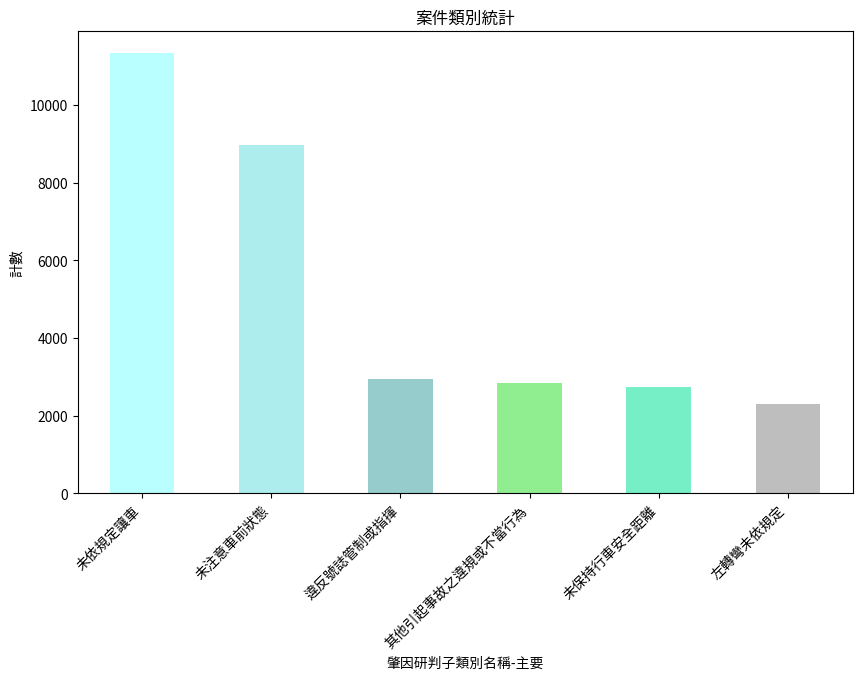

In [25]:
# 对肇因研判子類別名稱-主要进行分组计数
cause_count = merged_df['肇因研判子類別名稱-主要'].value_counts()
cause_count_filtered = cause_count[cause_count >= 2000]#定義條件

color_mapping = {
    '未依規定讓車': (0.73, 1.0, 1.0, 1.0),   # 浅蓝色
    '未注意車前狀態': (0.68, 0.93, 0.93, 1.0),  # 天蓝色
    '違反號誌管制或指揮': (0.59, 0.80, 0.80, 1.0),  # 青色
    '其他引起事故之違規或不當行為': (0.565, 0.933, 0.565),  #深綠色
    '未保持行車安全距離': (0.463, 0.933, 0.776),  # 薄荷色
    '左轉彎未依規定': (0.745, 0.745, 0.745)  # 灰色
}


plt.figure(figsize=(10, 6))#圖形大小



cause_count_filtered.plot( kind='bar',color=[tuple(color_mapping.get(name,(128,128,128))) for name in cause_count_filtered.index])#圖形樣式

plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

plt.xlabel('肇因研判子類別名稱-主要')
plt.ylabel('計數')
plt.title('案件類別統計')

plt.show()

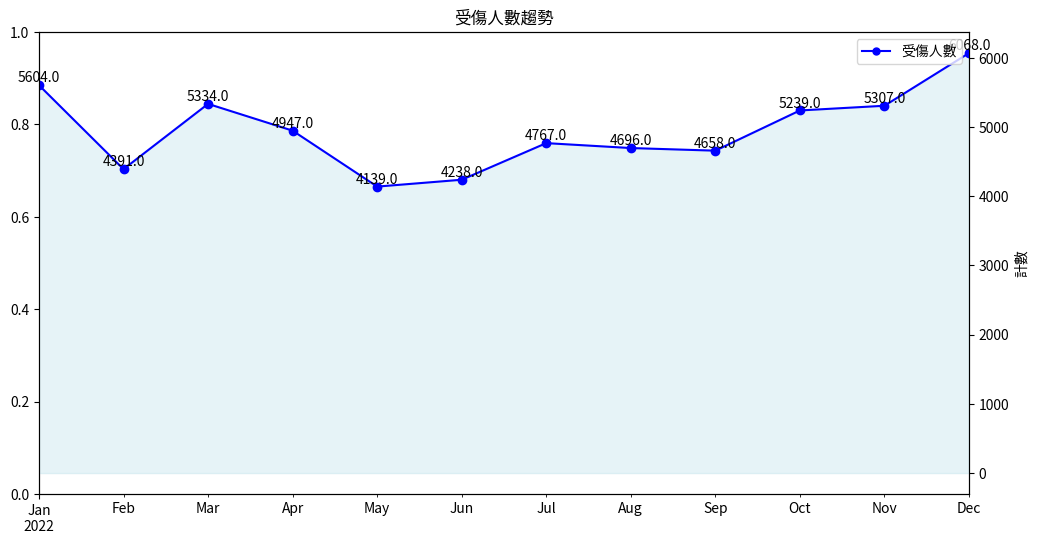

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import pandas as pd

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

plt.rcParams['font.sans-serif'] = ['TaipeiSansTCBeta-Regular.ttf']
plt.rcParams['axes.unicode_minus'] = False

merged_df = pd.concat([df1, df2])
merged_df['受傷人數'] = pd.to_numeric(merged_df['受傷人數'], errors='coerce')#清除空值
merged_df['發生日期'] = pd.to_datetime(merged_df['發生日期'])#定義時間格式
merged_df.set_index('發生日期', inplace=True)

injury_counts_by_month = merged_df.resample('M')['受傷人數'].sum()#以月總計
injury = injury_counts_by_month

plt.figure(figsize=(12, 6))

line = plt.twinx()
injury.plot(kind='line', color='blue', marker='o', label='受傷人數')

plt.fill_between(injury.index, injury, color='lightblue', alpha=0.3)##添加陰影

for i, value in enumerate(injury):
    plt.text(injury.index[i], value, str(value), ha='center', va='bottom', color='black', fontsize=10)

plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

plt.xlabel('發生日期')
plt.ylabel('計數')
plt.title('受傷人數趨勢')

line_legend = plt.Line2D((0, 1), (0, 0), color='blue', marker='o', markersize=5, label='受傷人數')
plt.legend(handles=[line_legend], loc='upper right', fontsize=10)

plt.show()